# Warli Art Generator

## Import all the necessary libraries

In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Get the number of samples in each class. Identify their size and channels

In [ ]:
data_dir = '/content/drive/MyDrive/Dataset/Warli Art Dataset'

for category in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, category)):
        category_dir = os.path.join(data_dir, category)
        image_files = [f for f in os.listdir(category_dir) if f.endswith(('.jpg'))]
        num_images = len(image_files)

        print(f"Category: {category}")
        print(f"Number of images: {num_images}")

        if num_images > 0:
            sample_image_path = os.path.join(category_dir, image_files[0])
            sample_image = Image.open(sample_image_path)
            image_size = sample_image.size
            # num_channels = len(sample_image.mode)
            num_channels = len(sample_image.getbands())

            print(f"Image size: {image_size}")
            print(f"Number of channels: {num_channels}")

        print()

Category: Instruments
Number of images: 565
Image size: (1280, 768)
Number of channels: 3

Category: Wedding ceremony
Number of images: 170
Image size: (1280, 768)
Number of channels: 3

Category: Sun
Number of images: 641
Image size: (1280, 768)
Number of channels: 3

Category: Woman
Number of images: 854
Image size: (1280, 768)
Number of channels: 3

Category: Weapon
Number of images: 108
Image size: (1280, 768)
Number of channels: 3

Category: Plants
Number of images: 573
Image size: (1280, 768)
Number of channels: 3

Category: House
Number of images: 749
Image size: (1280, 768)
Number of channels: 3

Category: Utensils
Number of images: 254
Image size: (1280, 768)
Number of channels: 3

Category: Mountains
Number of images: 358
Image size: (1280, 768)
Number of channels: 3

Category: Man
Number of images: 1001
Image size: (1280, 768)
Number of channels: 3

Category: Birds
Number of images: 701
Image size: (1280, 768)
Number of channels: 3

Category: Animals
Number of images: 429
Im

##Writing a data loader


### Example to understand

Transform is used to apply multiple diffrent transformation to an image.
```
transforms.Resize(H, W)
```
Here, we resize the image to **H x W**. For example: transforms.Resize(64, 64) sets H = 64 and W = 64.

Next,
```
transforms.ToTensor()
```
This converts the image into tensors.

Finally,
```
transforms.Normalize(mean, std)
```
Here, the operation would be

(Image_Tensor[i][j] - mean[i][j]) / std[i][j]

For example if we conider a tensor [0.8, 0.2, 0.5] applying transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]) would give you a tensor [0.6, -0.6, 0.0]

In [ ]:
image = Image.open('/content/drive/MyDrive/Dataset/Warli Art Dataset/Animals/Warli001.jpg')

transform1 = transforms.Compose([
    # transforms.Resize(64,64),
    transforms.ToTensor(),
    # transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])

transform2 = transforms.Compose([
    transforms.Resize(2,2),
    transforms.ToTensor(),
    # transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])

transform3 = transforms.Compose([
    transforms.Resize(2,2),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])

tensor_image1 = transform1(image)
tensor_image2 = transform2(image)
tensor_image3 = transform3(image)

print("One: ", tensor_image1)
print()
print("Two: ", tensor_image2)
print()
print("Three: ", tensor_image3)

One:  tensor([[[0.8000, 0.7647, 0.7098,  ..., 0.6627, 0.6667, 0.6706],
         [0.8235, 0.7922, 0.7451,  ..., 0.6588, 0.6627, 0.6627],
         [0.8549, 0.8353, 0.8000,  ..., 0.6588, 0.6549, 0.6549],
         ...,
         [0.8118, 0.8078, 0.8039,  ..., 0.6784, 0.6784, 0.6784],
         [0.8078, 0.8000, 0.7922,  ..., 0.6784, 0.6784, 0.6784],
         [0.8039, 0.7961, 0.7882,  ..., 0.6784, 0.6784, 0.6784]],

        [[0.7961, 0.7608, 0.7098,  ..., 0.6549, 0.6588, 0.6627],
         [0.8196, 0.7882, 0.7412,  ..., 0.6510, 0.6549, 0.6549],
         [0.8510, 0.8314, 0.7961,  ..., 0.6510, 0.6471, 0.6471],
         ...,
         [0.8157, 0.8118, 0.8078,  ..., 0.6588, 0.6588, 0.6588],
         [0.8118, 0.8039, 0.7961,  ..., 0.6588, 0.6588, 0.6588],
         [0.8078, 0.8000, 0.7922,  ..., 0.6588, 0.6588, 0.6588]],

        [[0.7765, 0.7412, 0.6784,  ..., 0.6078, 0.6118, 0.6157],
         [0.8039, 0.7686, 0.7216,  ..., 0.6039, 0.6078, 0.6078],
         [0.8431, 0.8157, 0.7804,  ..., 0.6039, 0.60

###Dataloader
```
ImageFolder(data_pth, transfrom=transform)
```
Image folder is used to load data (image in this case) form **dir** where the **dir** is the category of the image

It encodes the categories as an integer

like category1 = 0, category2 = 1, etc..

It also maintains a mapping of class to integers



In [ ]:
# Transforms
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])

# Path to data
data_pth = '/content/drive/MyDrive/Dataset/Warli Art Dataset'

# Dataloader
dataset = ImageFolder(data_pth, transform=transform)
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Print Images to verify
1.  Undo the normalization
```
img = img / 2 + 0.5
```

2. Convert the PyTorch tensor to numpy array
```
npimg = img.numpy()
```

3. Transpose the image in (H x W x C) format
```
plt.imshow(np.transpose(npimg, (1, 2, 0)))
```

4. This arranges the images in batches and shows one batchof images
```
torchvision.utils.make_grid(images)
```

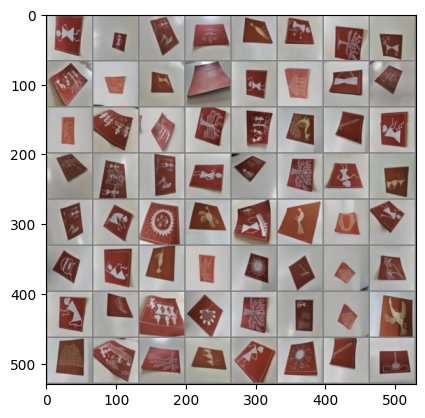

In [ ]:
# Print Images to verify
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
images, labels = next(iter(dataloader))

# Show images
imshow(torchvision.utils.make_grid(images))

## GAN

### Generator

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()
    self.model = nn.Sequential(

    )

### Discriminator

## Train

## Try out the Generator